In [1]:
%matplotlib inline
import pandas as pd


tripsDataFile = '../201402_Trips_WithBicycleDistanceSpeed.csv'

trips = pd.DataFrame.from_csv(tripsDataFile)
trips = trips[(trips['Duration'] <= 5400) & (trips['Duration'] > 60)]


/Users/p2723777/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [2]:

import datetime as datetime

# def groupByHour(starttime):
#     startdatetime = datetime.datetime.strptime(starttime, '%m/%d/%Y %H:%M')
#     return startdatetime.hour


def groupByHour(starttime):
    timestamp = datetime.datetime.strptime(starttime, '%m/%d/%Y %H:%M')
    year = timestamp.year
    month = timestamp.month
    day = timestamp.day
    hour = timestamp.hour
    return datetime.datetime(year, month, day, hour, 0)

In [3]:

trips['starthour']=trips['Start Date'].map(groupByHour)
tripStationHours=trips[['startStationId', 'starthour']].reset_index()

tripStationHourCounts = tripStationHours.groupby(['startStationId', 'starthour'])['Trip ID'].count().reset_index(name="startTripCount")
tripStationHourCounts

,startStationId,starthour,startTripCount
0,2,2013-08-29 13:00:00,1
1,2,2013-08-29 17:00:00,1
2,2,2013-08-29 19:00:00,2
3,2,2013-08-29 20:00:00,1
4,2,2013-08-30 08:00:00,2
5,2,2013-08-30 18:00:00,1
6,2,2013-08-30 19:00:00,1
7,2,2013-08-31 14:00:00,1
8,2,2013-08-31 16:00:00,1
9,2,2013-08-31 17:00:00,2


In [4]:
topStationsByCounts=[70,50,60,77,55,69,61]
topStationsByCounts

[70, 50, 60, 77, 55, 69, 61]

In [5]:
topStationHourlyCounts=tripStationHourCounts.loc[tripStationHourCounts['startStationId'].isin(topStationsByCounts)]

In [6]:
topStationHourlyCounts['startStationId'].unique()

topStationHourlyCounts.to_csv('./hourlyPatterns/201402_TopStationHourlyCounts.csv',index=False)

startStationId,50,55,60,61,69,70,77
starthour,,,,,,,
2013-08-29 10:00:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-08-29 11:00:00,4.0,0.0,0.0,1.0,4.0,9.0,0.0
2013-08-29 12:00:00,10.0,1.0,3.0,3.0,6.0,0.0,6.0
2013-08-29 13:00:00,3.0,1.0,2.0,1.0,3.0,1.0,3.0
2013-08-29 14:00:00,2.0,0.0,3.0,0.0,2.0,1.0,1.0
2013-08-29 15:00:00,4.0,0.0,5.0,0.0,2.0,3.0,3.0
2013-08-29 16:00:00,9.0,0.0,5.0,0.0,1.0,5.0,2.0
2013-08-29 17:00:00,0.0,0.0,3.0,0.0,0.0,4.0,9.0
2013-08-29 18:00:00,3.0,1.0,3.0,3.0,0.0,2.0,1.0


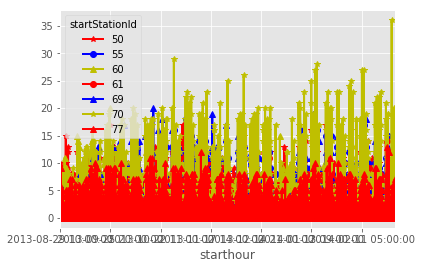

In [24]:

topStationHourlyCounts = pd.DataFrame.from_csv('./hourlyPatterns/201402_TopStationHourlyCounts.csv')
topStationHourlyCounts=topStationHourlyCounts.reset_index()
topStationHourlyCounts
topStationHourlyCounts=topStationHourlyCounts.pivot(index='starthour', columns='startStationId', values='startTripCount')
topStationHourlyCounts=topStationHourlyCounts.fillna(0)
topStationHourlyCounts

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# plot = topStationHourlyCounts.plot(x='starthour', kind='bar',title='topStationCountsOverTime')
# matplotlib.style.use('ggplot')
# plot=topStationHourlyCounts.plot()
# fig = plot.get_figure()
# fig.savefig("./hourlyPatterns/topStationCountsOverTime.png")

topStationHourlyCounts.plot(style=['r*-','bo-','y^-','ro-','b^-','y*-','r^-'], linewidth=2.0, kind='line')